In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
!pip install tensorflow-gpu

In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization

from keras.layers import Dropout

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [155]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
X_train = X_train/255
X_test = X_test/255

In [158]:

print("Class label of first image :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h3>3-Hidden Layers + sigmoid +BatchNormalization + Dropout</h3>





<style>
  h3{
    text-align:center
  }
</style>
<h3>Model</h3>
<p>
Input_nodes=784<br>
 
hidden_nodes_1=392<br>
hidden_nodes_2=196<br>
hidden_nodes_3=98<br>
output_nodes=10</p>

In [16]:
model_1=Sequential()
model_1.add(Dense(392,input_dim=784, activation='sigmoid', kernel_initializer='glorot_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(196, activation='sigmoid', kernel_initializer='glorot_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(98, activation='sigmoid', kernel_initializer='glorot_normal'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 392)               307720    
_________________________________________________________________
batch_normalization_7 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_4 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 196)               77028     
_________________________________________________________________
batch_normalization_8 (Batch (None, 196)               784       
_________________________________________________________________
dropout_5 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 98)                19306     
__________

In [25]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.5980 - acc: 0.8183 - val_loss: 0.2670 - val_acc: 0.9193
Epoch 2/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.3887 - acc: 0.8868 - val_loss: 0.2276 - val_acc: 0.9322
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3343 - acc: 0.9001 - val_loss: 0.2066 - val_acc: 0.9393
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.3031 - acc: 0.9115 - val_loss: 0.1889 - val_acc: 0.9449
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.2720 - acc: 0.9202 - val_loss: 0.1707 - val_acc: 0.9497
Epoch 6/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.2426 - acc: 0.9277 - val_loss: 0.1401 - val_acc: 0.9595
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2198 - acc: 0.9358 - val_loss: 0.1306 -

In [27]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07131129722064361
Test accuracy: 0.9802


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    fig.canvas.draw()
    plt.show()

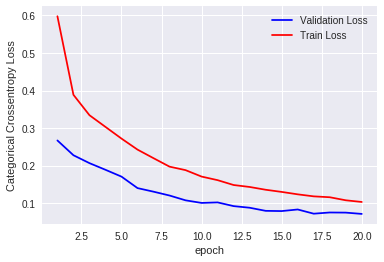

In [47]:
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


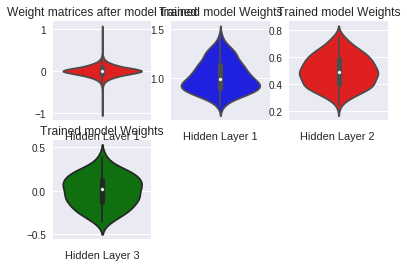

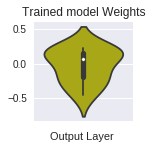

In [86]:
w_after = model_1.get_weights()

input_w= w_after[0].flatten().reshape(-1,1)
h1_w = w_after[2].flatten().reshape(-1,1)
h2_w = w_after[10].flatten().reshape(-1,1)
h3_w = w_after[15].flatten().reshape(-1,1)
out_w = w_after[19].flatten().reshape(-1,1)


fig = plt.figure()

plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=input_w,color='r')
plt.xlabel('Hidden Layer 1')

plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>3-Hidden Layers + relu +BatchNormalization + Dropout</h3>





In [48]:
model_2=Sequential()
model_2.add(Dense(392,input_dim=784, activation='relu', kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(196, activation='relu', kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(98, activation='relu', kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_10 (Batc (None, 392)               1568      
_________________________________________________________________
dropout_7 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_11 (Batc (None, 196)               784       
_________________________________________________________________
dropout_8 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 98)                19306     
__________

In [50]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2= model_2.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1420 - acc: 0.9581 - val_loss: 0.0897 - val_acc: 0.9736
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1320 - acc: 0.9605 - val_loss: 0.0780 - val_acc: 0.9774
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.1220 - acc: 0.9631 - val_loss: 0.0768 - val_acc: 0.9778
Epoch 4/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1125 - acc: 0.9670 - val_loss: 0.0670 - val_acc: 0.9798
Epoch 5/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1084 - acc: 0.9671 - val_loss: 0.0725 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1078 - acc: 0.9680 - val_loss: 0.0665 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1007 - acc: 0.9707 - val_loss: 0.0

Test score: 0.05639945089344401
Test accuracy: 0.9844


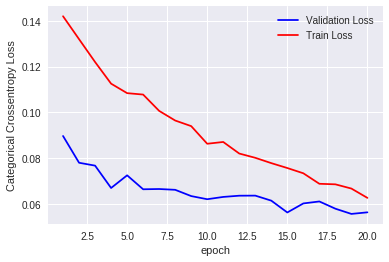

In [51]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history_2.history['val_loss']
ty = history_2.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


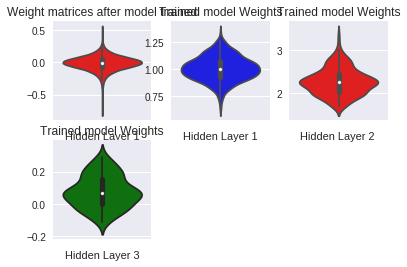

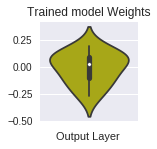

In [85]:
w_after = model_2.get_weights()

input_w= w_after[0].flatten().reshape(-1,1)
h1_w = w_after[2].flatten().reshape(-1,1)
h2_w = w_after[10].flatten().reshape(-1,1)
h3_w = w_after[15].flatten().reshape(-1,1)
out_w = w_after[19].flatten().reshape(-1,1)


fig = plt.figure()

plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=input_w,color='r')
plt.xlabel('Hidden Layer 1')

plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>3-Hidden Layers + Relu </h3>





In [94]:
model_3=Sequential()
model_3.add(Dense(392,input_dim=784, activation='relu', kernel_initializer='he_normal'))

model_3.add(Dense(196, activation='relu', kernel_initializer='he_normal'))

model_3.add(Dense(98, activation='relu', kernel_initializer='he_normal'))

model_3.add(Dense(10, activation='softmax'))
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_25 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_26 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________


In [95]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_3= model_3.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2279 - acc: 0.9322 - val_loss: 0.1260 - val_acc: 0.9611
Epoch 2/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0846 - acc: 0.9741 - val_loss: 0.0759 - val_acc: 0.9768
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0561 - acc: 0.9827 - val_loss: 0.0811 - val_acc: 0.9745
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0393 - acc: 0.9873 - val_loss: 0.0743 - val_acc: 0.9775
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0312 - acc: 0.9899 - val_loss: 0.0754 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0289 - acc: 0.9901 - val_loss: 0.0734 - val_acc: 0.9806
Epoch 7/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0227 - acc: 0.9924 - val_loss: 0.1059 - val_acc

Test score: 0.1102047194287487
Test accuracy: 0.9775


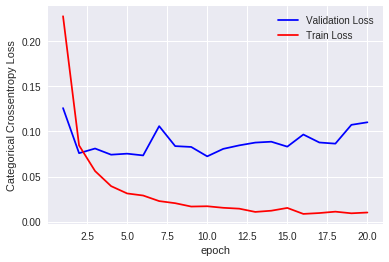

In [96]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history_3.history['val_loss']
ty = history_3.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


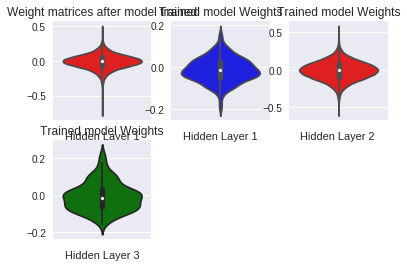

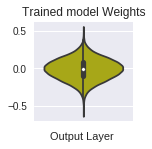

In [98]:
w_after = model_3.get_weights()

input_w= w_after[0].flatten().reshape(-1,1)
h1_w = w_after[1].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()

plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=input_w,color='r')
plt.xlabel('Hidden Layer 1')

plt.title("Weight matrices after model trained")
plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>5-Hidden Layers + relu +BatchNormalization + Dropout</h3>





In [100]:
model=Sequential()
model.add(Dense(600,input_dim=784, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_16 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_13 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_17 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_14 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 200)               80200     
__________

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 265us/step - loss: 1.1220 - acc: 0.6475 - val_loss: 0.2266 - val_acc: 0.9331
Epoch 2/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.4049 - acc: 0.8921 - val_loss: 0.1624 - val_acc: 0.9539
Epoch 3/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.3013 - acc: 0.9227 - val_loss: 0.1321 - val_acc: 0.9636
Epoch 4/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.2451 - acc: 0.9383 - val_loss: 0.1218 - val_acc: 0.9675
Epoch 5/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.2209 - acc: 0.9448 - val_loss: 0.1125 - val_acc: 0.9700
Epoch 6/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.2051 - acc: 0.9490 - val_loss: 0.1047 - val_acc: 0.9721
Epoch 7/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.1850 - acc: 0.9542 - val_loss: 0.

Test score: 0.0718174891603645
Test accuracy: 0.9828


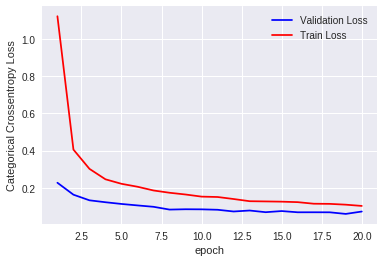

In [102]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [103]:
w_after = model_3.get_weights()
len(w_after)

8

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


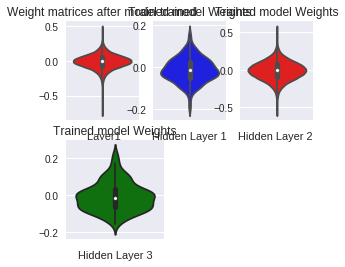

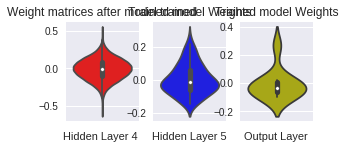

In [106]:
w_after = model_3.get_weights()

input_w= w_after[0].flatten().reshape(-1,1)
h1_w = w_after[1].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
h5_w = w_after[5].flatten().reshape(-1,1)
out_w = w_after[7].flatten().reshape(-1,1)


fig = plt.figure()

plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=input_w,color='r')
plt.xlabel(' Layer1')

plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2, 4, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5')

plt.subplot(2, 4, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>5-Hidden Layers + relu </h3>





In [107]:
model=Sequential()
model.add(Dense(600,input_dim=784, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(400, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_35 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_36 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_37 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
Total params: 817,260
Trainable params: 817,260
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2191 - acc: 0.9340 - val_loss: 0.1087 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0874 - acc: 0.9734 - val_loss: 0.0819 - val_acc: 0.9753
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0628 - acc: 0.9809 - val_loss: 0.0865 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0804 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0399 - acc: 0.9870 - val_loss: 0.0824 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0694 - val_acc: 0.9808
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0288 - acc: 0.9909 - val_loss: 0.0876 - val_ac

Test score: 0.08659954464845512
Test accuracy: 0.9826


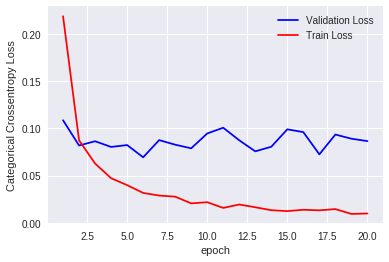

In [109]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


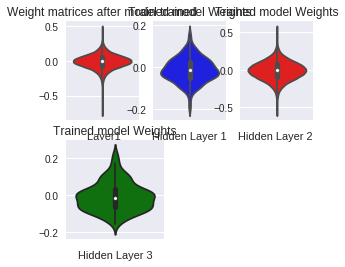

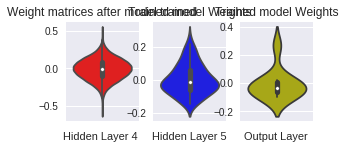

In [110]:
w_after = model_3.get_weights()

input_w= w_after[0].flatten().reshape(-1,1)
h1_w = w_after[1].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[3].flatten().reshape(-1,1)
h4_w = w_after[4].flatten().reshape(-1,1)
h5_w = w_after[5].flatten().reshape(-1,1)
out_w = w_after[7].flatten().reshape(-1,1)


fig = plt.figure()

plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=input_w,color='r')
plt.xlabel(' Layer1')

plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='g')
plt.xlabel('Hidden Layer 3')
plt.show()

plt.subplot(2, 4, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.title("Weight matrices after model trained")
plt.subplot(2, 4, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5')

plt.subplot(2, 4, 7)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>2-Hidden Layers + relu +BatchNormalization + Dropout</h3>





In [112]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer='he_normal'))
model_batch.add(BatchNormalization())
model.add(Dropout(0.5))
model_batch.add(Dense(128, activation='relu', kernel_initializer='he_normal') )
model_batch.add(BatchNormalization())
model.add(Dropout(0.5))
model_batch.add(Dense(10, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [114]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=100, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1863 - acc: 0.9443 - val_loss: 0.1005 - val_acc: 0.9696
Epoch 2/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0719 - acc: 0.9778 - val_loss: 0.0895 - val_acc: 0.9731
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0711 - val_acc: 0.9773
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0726 - val_acc: 0.9760
Epoch 5/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0284 - acc: 0.9911 - val_loss: 0.0721 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0763 - val_acc: 0.9781
Epoch 7/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0232 - acc: 0.9920 - val_loss: 0.0632 - 

Test score: 0.08245052143703652
Test accuracy: 0.9801


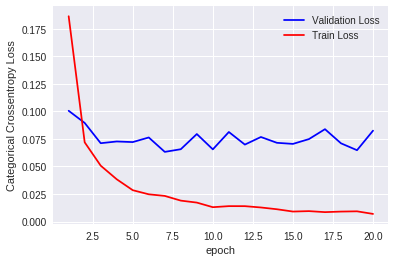

In [115]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [141]:
y_test.shape

(10000,)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


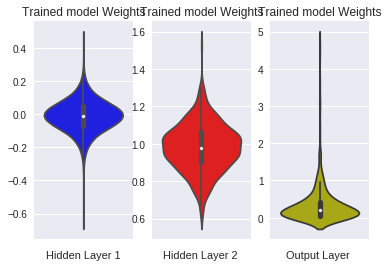

In [116]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>2-Hidden Layers + Relu</h3>





In [117]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer='he_normal'))
model_batch.add(Dense(128, activation='relu', kernel_initializer='he_normal') )
model_batch.add(Dense(10, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [118]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=100, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2247 - acc: 0.9332 - val_loss: 0.1072 - val_acc: 0.9665
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0838 - acc: 0.9742 - val_loss: 0.0790 - val_acc: 0.9765
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0526 - acc: 0.9831 - val_loss: 0.0864 - val_acc: 0.9722
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0363 - acc: 0.9884 - val_loss: 0.0652 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0286 - acc: 0.9911 - val_loss: 0.0765 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0741 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0755 - val_acc

Test score: 0.10172696074068881
Test accuracy: 0.9812


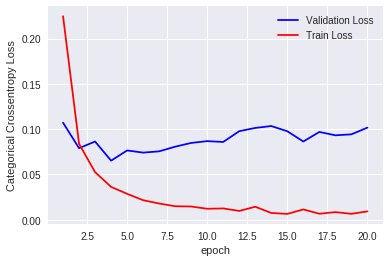

In [119]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
nb_epoch=20
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


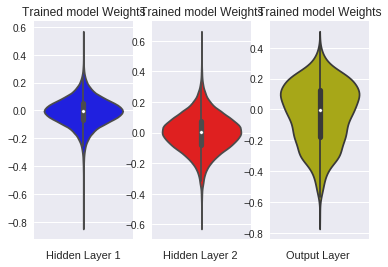

In [120]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>Report</h2>

Using MNIST dataset Images whwew each image is 784 pixels

Each image corresponds to a digit between 1-9

using onehot encoding for the label for softmax classifier

Split the dataset into train and test

Normalize the train and test data

Convert class variable into categorical data vector

Implement Softmax classifier with 2 , 3 and 5 hidden layers with relu and sigmoid activations .

Adding Dropouts and Batch Normalization to the hidden layers .



In [129]:
x = PrettyTable()

x.field_names = ["No of HiddenLayers", "Activation","Batch_Normalization && Dropout","Train loss","Train Acc","Test Loss","Test Acc"]

x.add_row(["3", "sigmoid", True,0.1031, 0.9700 , 0.0713 , 0.9802])
x.add_row(["3", "relu", True,  0.0627, 0.9811 , 0.0564 , 0.9844])
x.add_row(["3","relu" , False,  0.0101 , 0.9971, 0.1102 , 0.9775])
x.add_row(["5","relu", True,0.1019, 0.9749 , 0.0718 , 0.9828])
x.add_row(["5","relu" ,False, 0.0098 , 0.9974, 0.0866 , 0.9826])
x.add_row(["2","relu", True,0.0069 , 0.9977 , 0.0825 , 0.9801])
x.add_row(["2","relu", False, 0.0092 ,0.9969 , 0.1017 ,0.9812])

print(x)

+--------------------+------------+--------------------------------+------------+-----------+-----------+----------+
| No of HiddenLayers | Activation | Batch_Normalization && Dropout | Train loss | Train Acc | Test Loss | Test Acc |
+--------------------+------------+--------------------------------+------------+-----------+-----------+----------+
|         3          |  sigmoid   |              True              |   0.1031   |    0.97   |   0.0713  |  0.9802  |
|         3          |    relu    |              True              |   0.0627   |   0.9811  |   0.0564  |  0.9844  |
|         3          |    relu    |             False              |   0.0101   |   0.9971  |   0.1102  |  0.9775  |
|         5          |    relu    |              True              |   0.1019   |   0.9749  |   0.0718  |  0.9828  |
|         5          |    relu    |             False              |   0.0098   |   0.9974  |   0.0866  |  0.9826  |
|         2          |    relu    |              True           